In [1]:
# set cell display width
from IPython.display import display, HTML
display(HTML('<style>.container { width: 930px !important; }</style>'))

In [2]:
# import ML tools
import pandas as pd
import numpy as np

In [3]:
# import plotting tools
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize
# set grid size and style
figsize(12, 4)
sns.set_style('whitegrid')

Use "mp.colors(<index>)" as color attribute for Seaborn plots.
This is your color palette...


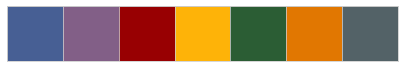

In [4]:
# import custom palette
import my_palette as mp

In [5]:
# set option for palette argument
my_palette = ['xkcd:' + c for c in mp.my_colors]

In [6]:
# read in dataset
actor_df = pd.read_json('capstone1_ref.json')

In [7]:
# groupby actor while aggregating over all other features
df = actor_df.groupby('person_id').agg(
    {'revenue': np.sum, 'budget': np.sum, 'age': np.mean, 'gender': np.mean, 
     'order':np.mean, 'popularity':np.mean, 'release_date': np.mean, 'runtime': np.mean, 
     'usa': np.mean, 'vote_average': np.mean, 'vote_count': np.sum, 
     'action': np.sum, 'adventure': np.sum, 'animation': np.sum, 'comedy': np.sum, 
     'crime': np.sum, 'drama': np.sum, 'family': np.sum, 'fantasy': np.sum, 
     'history': np.sum, 'horror': np.sum, 'music': np.sum, 'mystery': np.sum, 
     'romance': np.sum, 'science_fiction': np.sum, 'thriller': np.sum, 
     'war': np.sum, 'western': np.sum})

In [8]:
# assign better name to target
df.rename(columns={'revenue': 'actor_value'}, inplace=True)

In [9]:
# change gender labels
df['gender'].replace([0, 1], ['male', 'female'], inplace=True)

In [10]:
# observe a bit of the data
df.iloc[:3, :11]

,actor_value,budget,age,gender,order,popularity,release_date,runtime,usa,vote_average,vote_count
person_id,,,,,,,,,,,
2,1.136000e+10,9.598281e+08,46.683803,male,0.818182,44.132909,1997.818182,112.818182,1,7.145455,66333
3,1.838296e+10,3.594353e+09,55.134863,male,0.761905,25.411429,1997.190476,119.000000,1,6.730952,125703
4,1.170593e+10,1.132195e+09,40.177873,female,3.000000,32.998267,1996.466667,115.200000,1,6.660000,67753


I will categorize the actors with respect to their earning history.<br>
Top actors will be the upper 10% of the profitability figures.<br>
Elite actors will be the top 1% of that category.

In [11]:
# extract top profitable actors
top_df = df[df['actor_value'] >= df['actor_value'].quantile(0.9)]

In [12]:
# extract elite profitable actors
elite_df = df[df['actor_value'] >= df['actor_value'].quantile(0.99)]

In [13]:
# recall features
df.columns

Index(['actor_value', 'budget', 'age', 'gender', 'order', 'popularity',
       'release_date', 'runtime', 'usa', 'vote_average', 'vote_count',
       'action', 'adventure', 'animation', 'comedy', 'crime', 'drama',
       'family', 'fantasy', 'history', 'horror', 'music', 'mystery', 'romance',
       'science_fiction', 'thriller', 'war', 'western'],
      dtype='object')

In [14]:
# create list of non-genre feature names
non_genre_lst = ['actor_value', 'budget', 'age', 'gender', 'order', 'popularity',
                 'release_date', 'runtime', 'usa', 'vote_average', 'vote_count']

In [15]:
# create list of genre feature names
genre_lst = np.setdiff1d(df.columns, non_genre_lst)

In [16]:
# observe non-genre statistics for all actors
df[non_genre_lst].describe()

,actor_value,budget,age,order,popularity,release_date,runtime,usa,vote_average,vote_count
count,1.169300e+04,1.169300e+04,11693.000000,11693.000000,11693.000000,11693.000000,11693.000000,11693.000000,11693.000000,11693.000000
mean,5.647359e+08,1.766035e+08,37.860803,4.420431,13.258343,1996.124671,107.950944,0.445224,6.403431,6074.487471
std,1.243346e+09,3.569200e+08,14.003562,2.109674,8.071933,20.294316,17.639757,0.497012,0.844907,14323.047646
min,1.238841e+00,1.600217e+00,1.182776,0.000000,0.600000,1913.000000,70.000000,0.000000,1.000000,1.000000
25%,3.130126e+07,1.700949e+07,27.874631,3.000000,9.088500,1988.000000,96.500000,0.000000,5.953846,294.000000
50%,1.396449e+08,5.355083e+07,36.148586,4.500000,12.872000,2002.600000,105.666667,0.000000,6.400000,1341.000000
75%,5.060413e+08,1.675207e+08,46.733335,6.000000,16.150000,2010.416667,116.000000,1.000000,6.885714,5038.000000
max,1.970652e+10,5.316126e+09,98.961649,8.000000,205.280000,2020.000000,248.000000,1.000000,10.000000,278015.000000


In [17]:
# observe non-genre statistics for top profitable actors
top_df[non_genre_lst].describe()

,actor_value,budget,age,order,popularity,release_date,runtime,usa,vote_average,vote_count
count,1.170000e+03,1.170000e+03,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000
mean,3.427562e+09,9.404680e+08,41.694243,3.288823,18.340834,1999.954395,113.262099,0.554701,6.560636,35647.929915
std,2.331663e+09,7.016681e+08,12.261944,1.599764,6.845504,16.043496,15.490817,0.497211,0.417060,30172.018043
min,1.434522e+09,1.342198e+07,7.994688,0.000000,7.138500,1938.000000,70.000000,0.000000,4.633333,1358.000000
25%,1.836201e+09,4.723286e+08,33.428749,2.083333,14.445868,1997.016667,105.856579,0.000000,6.288545,15813.500000
50%,2.596255e+09,7.747102e+08,41.140056,3.200000,16.646883,2004.494186,112.616071,1.000000,6.530217,27782.500000
75%,4.158416e+09,1.214870e+09,49.522321,4.400000,19.989300,2009.883333,118.985294,1.000000,6.794345,46678.250000
max,1.970652e+10,5.316126e+09,87.377564,8.000000,70.006500,2019.000000,233.000000,1.000000,8.300000,278015.000000


In [18]:
# observe non-genre statistics for elite profitable actors
elite_df[non_genre_lst].describe()

,actor_value,budget,age,order,popularity,release_date,runtime,usa,vote_average,vote_count
count,1.170000e+02,1.170000e+02,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,8.935202e+09,2.127852e+09,44.839703,2.403420,20.792524,1997.885811,122.520501,0.529915,6.737022,88096.487179
std,2.434628e+09,1.059196e+09,12.054606,1.546837,6.885086,19.439907,26.133854,0.501251,0.400470,49583.712854
min,6.632390e+09,7.374714e+07,19.211620,0.309524,9.462429,1939.000000,75.600000,0.000000,5.958824,2207.000000
25%,7.372268e+09,1.663147e+09,37.568778,1.121951,16.658677,1998.322581,113.107143,0.000000,6.495652,59724.000000
50%,7.968151e+09,2.216197e+09,42.334613,2.243902,18.754977,2004.409091,117.767442,1.000000,6.660000,83709.000000
75%,9.658434e+09,2.762747e+09,53.893144,3.400000,22.710583,2008.500000,123.190476,1.000000,6.900000,120226.000000
max,1.970652e+10,5.316126e+09,73.597548,8.000000,60.116667,2016.000000,233.000000,1.000000,7.900000,278015.000000


In [19]:
# observe genre statistics for all actors
df[genre_lst].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
action,11693.0,0.972975,1.975938,0.0,0.0,0.0,1.0,38.0
adventure,11693.0,0.673993,1.441506,0.0,0.0,0.0,1.0,23.0
animation,11693.0,0.181048,0.658617,0.0,0.0,0.0,0.0,11.0
comedy,11693.0,1.279826,2.489980,0.0,0.0,1.0,1.0,34.0
crime,11693.0,0.582571,1.364646,0.0,0.0,0.0,1.0,27.0
drama,11693.0,1.644146,2.809986,0.0,0.0,1.0,2.0,33.0
family,11693.0,0.381681,0.982726,0.0,0.0,0.0,0.0,15.0
fantasy,11693.0,0.363636,0.901201,0.0,0.0,0.0,0.0,17.0
history,11693.0,0.156931,0.521274,0.0,0.0,0.0,0.0,9.0
horror,11693.0,0.397674,0.773581,0.0,0.0,0.0,1.0,11.0


In [20]:
# observe genre statistics for top profitable actors
top_df[genre_lst].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
action,1170.0,4.132479,4.127612,0.0,1.0,3.0,6.0,38.0
adventure,1170.0,3.376068,2.893391,0.0,1.0,3.0,5.0,23.0
animation,1170.0,1.035043,1.545313,0.0,0.0,0.0,1.0,11.0
comedy,1170.0,5.233333,5.311132,0.0,1.0,4.0,8.0,34.0
crime,1170.0,2.417094,3.054461,0.0,0.0,1.0,4.0,27.0
drama,1170.0,6.407692,5.804819,0.0,2.0,5.0,9.0,33.0
family,1170.0,1.788889,2.129442,0.0,0.0,1.0,3.0,15.0
fantasy,1170.0,1.747863,1.925165,0.0,0.0,1.0,3.0,17.0
history,1170.0,0.689744,1.132148,0.0,0.0,0.0,1.0,9.0
horror,1170.0,0.950427,1.271900,0.0,0.0,1.0,1.0,11.0


In [21]:
# observe genre statistics for elite actors
elite_df[genre_lst].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
action,117.0,9.222222,7.099188,0.0,4.0,8.0,13.0,38.0
adventure,117.0,7.623932,4.072038,0.0,5.0,8.0,10.0,23.0
animation,117.0,1.923077,2.000663,0.0,0.0,1.0,3.0,11.0
comedy,117.0,8.384615,7.587247,0.0,2.0,7.0,12.0,32.0
crime,117.0,4.760684,5.303950,0.0,0.0,4.0,7.0,27.0
drama,117.0,11.307692,7.705195,0.0,5.0,11.0,16.0,33.0
family,117.0,3.239316,3.131182,0.0,1.0,2.0,4.0,15.0
fantasy,117.0,3.863248,3.045364,0.0,1.0,4.0,6.0,17.0
history,117.0,1.393162,1.761452,0.0,0.0,1.0,2.0,9.0
horror,117.0,1.222222,1.377849,0.0,0.0,1.0,2.0,6.0


There are some trend in the data.<br>
I will explore a few of them with visualizations.

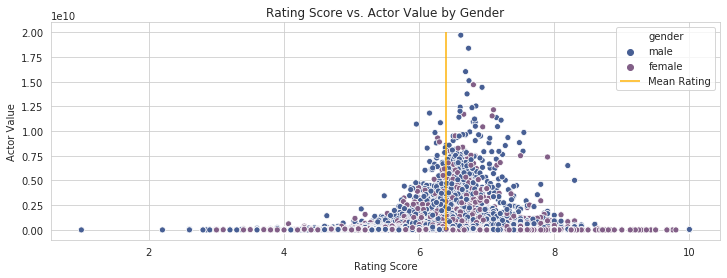

In [22]:
# plot rating score vs. actor value by gender

sns.scatterplot(x='vote_average', y='actor_value', hue='gender', data=df, 
               palette=my_palette[:2])

plt.vlines(x=np.mean(df['vote_average']), ymin=0, ymax=2e10, 
           colors=mp.colors(3), label='Mean Rating')

plt.xlabel('Rating Score')
plt.ylabel('Actor Value')

plt.legend()
plt.title('Rating Score vs. Actor Value by Gender');

The actors with the highest total revenues act in movies that have higher ratings.<br>
The most of the largest total revenue values are associated with male actors.

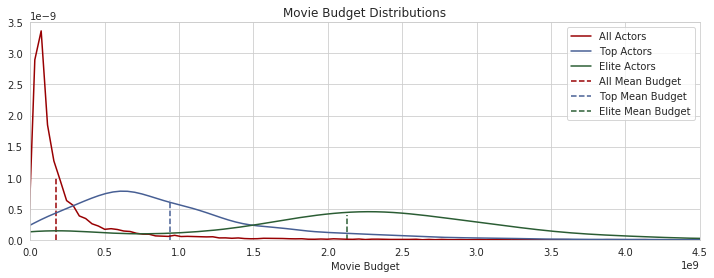

In [23]:
# plot movie budget distributions for all actors vs. top actors

plt.xlim(0, 4.5e9)
plt.ylim(0, 3.5e-9)

sns.kdeplot(df['budget'],color=mp.colors(2), label='All Actors')
plt.vlines(x=np.mean(df['budget']), ymin=0, ymax=1e-9, color=mp.colors(2), 
           label='All Mean Budget', linestyles='dashed')

sns.kdeplot(top_df['budget'], color=mp.colors(0),label='Top Actors')
plt.vlines(x=np.mean(top_df['budget']), ymin=0, ymax=6.4e-10, color=mp.colors(0), 
          label='Top Mean Budget', linestyles='dashed')

sns.kdeplot(elite_df['budget'], color=mp.colors(4),label='Elite Actors')
plt.vlines(x=np.mean(elite_df['budget']), ymin=0, ymax=4e-10, color=mp.colors(4), 
          label='Elite Mean Budget', linestyles='dashed')

plt.xlabel('Movie Budget')
plt.legend()
plt.title('Movie Budget Distributions');

The average movie budget totals increase as we go from all actors to the most elite ones.<br>
It makes sense that larger budgets would result in larger revenues, on average.<br>
However, the elite actors have a very wide spread over the whole range of budget totals.<br>
This signifies that elite actors have a higher correlation with larger revenues, despite the sum total of an actor's movie budgets.<br>
Whereas the average actor's total budget values crash abruptly at around one hundred million dollars.

I will zoom in to observe this better.

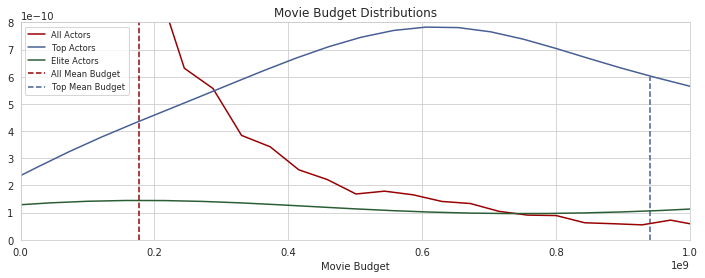

In [24]:
# plot movie budget distributions for all actors vs. top actors (closer scale)

plt.xlim(0, 1e9)
plt.ylim(0, 8e-10)

sns.kdeplot(df['budget'],color=mp.colors(2), label='All Actors')
plt.vlines(x=np.mean(df['budget']), ymin=0, ymax=1e-9, color=mp.colors(2), 
           label='All Mean Budget', linestyles='dashed')

sns.kdeplot(top_df['budget'], color=mp.colors(0),label='Top Actors')
plt.vlines(x=np.mean(top_df['budget']), ymin=0, ymax=6e-10, color=mp.colors(0), 
          label='Top Mean Budget', linestyles='dashed')

sns.kdeplot(elite_df['budget'], color=mp.colors(4),label='Elite Actors')

plt.xlabel('Movie Budget')
plt.legend(fontsize='small')
plt.title('Movie Budget Distributions');

Notice the elite actors' distribution, as it remains horizontal across the whole billion dollar range.

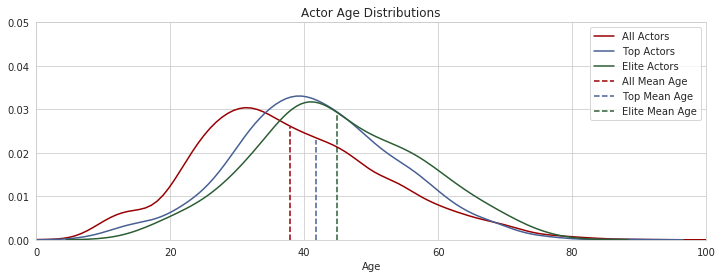

In [25]:
# plot age distributions for all actors vs. top actors

plt.xlim(0, 100)
plt.ylim(0, 0.05)

sns.kdeplot(df['age'],color=mp.colors(2), label='All Actors')
plt.vlines(x=np.mean(df['age']), ymin=0, ymax=0.026, color=mp.colors(2), 
           label='All Mean Age', linestyles='dashed')

sns.kdeplot(top_df['age'], color=mp.colors(0),label='Top Actors')
plt.vlines(x=np.mean(top_df['age']), ymin=0, ymax=0.023, color=mp.colors(0), 
          label='Top Mean Age', linestyles='dashed')

sns.kdeplot(elite_df['age'], color=mp.colors(4),label='Elite Actors')
plt.vlines(x=np.mean(elite_df['age']), ymin=0, ymax=0.029, color=mp.colors(4), 
          label='Elite Mean Age', linestyles='dashed')

plt.xlabel('Age')
plt.legend()
plt.title('Actor Age Distributions');

The average actor age increases as we go from all actors to the most elite ones.<br>
This may be a bias toward older actors who have had more time to add movie revenues to their totals.

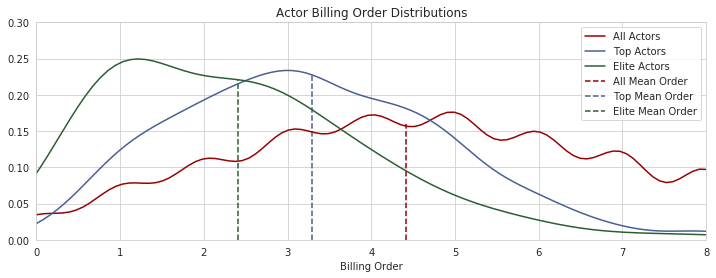

In [26]:
# plot billing order distributions for all actors vs. top actors

plt.xlim(0, 8)
plt.ylim(0, 0.3)

sns.kdeplot(df['order'],color=mp.colors(2), label='All Actors')
plt.vlines(x=np.mean(df['order']), ymin=0, ymax=0.16, color=mp.colors(2), 
           label='All Mean Order', linestyles='dashed')

sns.kdeplot(top_df['order'], color=mp.colors(0),label='Top Actors')
plt.vlines(x=np.mean(top_df['order']), ymin=0, ymax=0.23, color=mp.colors(0), 
          label='Top Mean Order', linestyles='dashed')

sns.kdeplot(elite_df['order'], color=mp.colors(4),label='Elite Actors')
plt.vlines(x=np.mean(elite_df['order']), ymin=0, ymax=0.22, color=mp.colors(4), 
          label='Elite Mean Order', linestyles='dashed')

plt.xlabel('Billing Order')
plt.legend()
plt.title('Actor Billing Order Distributions');

The lower billing orders reflect more prominent acting roles.<br>
An actor tends to have more starring roles as we go from all actors to the most elite ones.

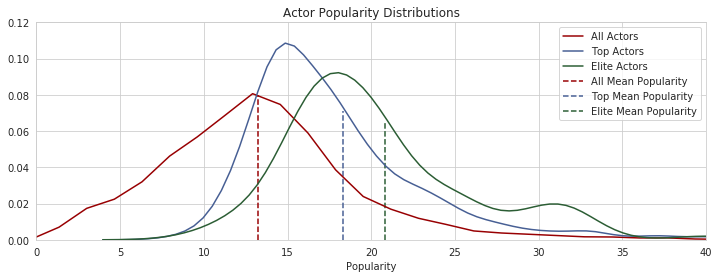

In [27]:
# plot actor popularity distributions for all actors vs. top actors

plt.xlim(0, 40)
plt.ylim(0, 0.12)

sns.kdeplot(df['popularity'],color=mp.colors(2), label='All Actors')
plt.vlines(x=np.mean(df['popularity']), ymin=0, ymax=0.08, color=mp.colors(2), 
           label='All Mean Popularity', linestyles='dashed')

sns.kdeplot(top_df['popularity'], color=mp.colors(0),label='Top Actors')
plt.vlines(x=np.mean(top_df['popularity']), ymin=0, ymax=0.071, color=mp.colors(0), 
          label='Top Mean Popularity', linestyles='dashed')

sns.kdeplot(elite_df['popularity'], color=mp.colors(4),label='Elite Actors')
plt.vlines(x=np.mean(elite_df['popularity']), ymin=0, ymax=0.065, color=mp.colors(4), 
          label='Elite Mean Popularity', linestyles='dashed')

plt.xlabel('Popularity')
plt.legend()
plt.title('Actor Popularity Distributions');

Popularity is a TMDb proprietary ranking determined by website activity pertaining to the actors.<br>
The average actor popularity increases as we go from all actors to the most elite ones.<br>
There is a second mode in the elite distribution at the high end.<br>
This may point to a super elite group of actors that can be analyzed as a new tier.

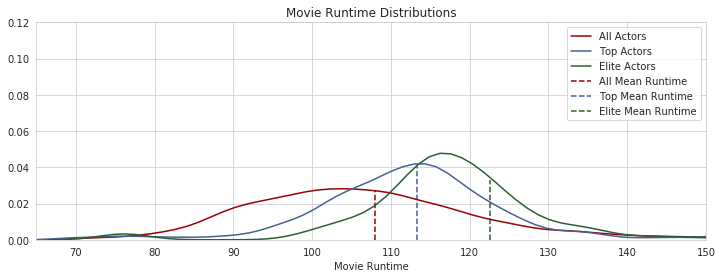

In [28]:
# plot movie runtime distributions for all actors vs. top actors

plt.xlim(65, 150)
plt.ylim(0, 0.12)

sns.kdeplot(df['runtime'],color=mp.colors(2), label='All Actors')
plt.vlines(x=np.mean(df['runtime']), ymin=0, ymax=0.027, color=mp.colors(2), 
           label='All Mean Runtime', linestyles='dashed')

sns.kdeplot(top_df['runtime'], color=mp.colors(0),label='Top Actors')
plt.vlines(x=np.mean(top_df['runtime']), ymin=0, ymax=0.041, color=mp.colors(0), 
          label='Top Mean Runtime', linestyles='dashed')

sns.kdeplot(elite_df['runtime'], color=mp.colors(4),label='Elite Actors')
plt.vlines(x=np.mean(elite_df['runtime']), ymin=0, ymax=0.033, color=mp.colors(4), 
          label='Elite Mean Runtime', linestyles='dashed')

plt.xlabel('Movie Runtime')
plt.legend()
plt.title('Movie Runtime Distributions');

The average movie runtime increases as we go from all actors to the most elite ones.<br>
Longer runtimes will tend to increase movie budgets, which we have seen are correlated to increased revenue totals.

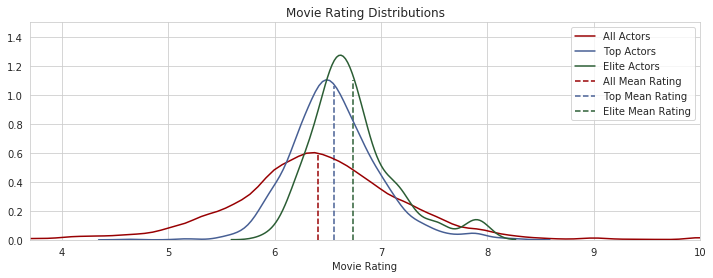

In [29]:
# plot movie rating distributions for all actors vs. top actors

plt.xlim(3.7, 10)
plt.ylim(0, 1.5)

sns.kdeplot(df['vote_average'],color=mp.colors(2), label='All Actors')
plt.vlines(x=np.mean(df['vote_average']), ymin=0, ymax=0.6, color=mp.colors(2), 
           label='All Mean Rating', linestyles='dashed')

sns.kdeplot(top_df['vote_average'], color=mp.colors(0),label='Top Actors')
plt.vlines(x=np.mean(top_df['vote_average']), ymin=0, ymax=1.06, color=mp.colors(0), 
          label='Top Mean Rating', linestyles='dashed')

sns.kdeplot(elite_df['vote_average'], color=mp.colors(4),label='Elite Actors')
plt.vlines(x=np.mean(elite_df['vote_average']), ymin=0, ymax=1.1, color=mp.colors(4), 
          label='Elite Mean Rating', linestyles='dashed')

plt.xlabel('Movie Rating')
plt.legend()
plt.title('Movie Rating Distributions');

The average movie rating increases as we go from all actors to the most elite ones.<br>
The distribution for all actors has a wide spread throughout the ratings.<br>
This points to reviewers agreeing more about which actors are elite.<br>
While, there is a greater uncertainty when it comes to rating the movies of the average actor.

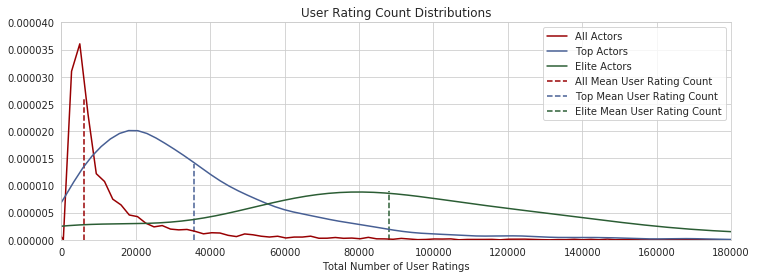

In [30]:
# plot total number of user ratings distributions for all actors vs. top actors

plt.xlim(0, 18e4)
plt.ylim(0, 4e-5)

sns.kdeplot(df['vote_count'],color=mp.colors(2), label='All Actors')
plt.vlines(x=np.mean(df['vote_count']), ymin=0, ymax=26e-6, color=mp.colors(2), 
           label='All Mean User Rating Count', linestyles='dashed')

sns.kdeplot(top_df['vote_count'], color=mp.colors(0),label='Top Actors')
plt.vlines(x=np.mean(top_df['vote_count']), ymin=0, ymax=14e-6, color=mp.colors(0), 
          label='Top Mean User Rating Count', linestyles='dashed')

sns.kdeplot(elite_df['vote_count'], color=mp.colors(4),label='Elite Actors')
plt.vlines(x=np.mean(elite_df['vote_count']), ymin=0, ymax=9e-6, color=mp.colors(4), 
          label='Elite Mean User Rating Count', linestyles='dashed')

plt.xlabel('Total Number of User Ratings')
plt.legend()
plt.title('User Rating Count Distributions');

The average number of total user ratings increases as we go from all actors to the most elite ones.<br>
This supports the idea that name recognition will drive revenue numbers.<br>
This is commonly referred to as star power.

There are clear trends that will be helpful for making predictions about which actors will have the highest revenue totals.

Now, I will rank the actors by their tier.

In [31]:
# create top actor binary feature
df['is_top'] = df['actor_value'].transform(
    lambda x: int(x >= np.min(top_df['actor_value']) ))

In [32]:
# create elite actor binary feature
df['is_elite'] = df['actor_value'].transform(
    lambda x: int(x >= np.min(elite_df['actor_value']) ))

In [33]:
# create actor rank feature
df['rank'] = df['is_top'] + df['is_elite']

In [34]:
# observe DataFrame without looking at genres
df.drop(genre_lst, axis=1).head(3)

,actor_value,budget,age,gender,order,popularity,release_date,runtime,usa,vote_average,vote_count,is_top,is_elite,rank
person_id,,,,,,,,,,,,,,
2,1.136000e+10,9.598281e+08,46.683803,male,0.818182,44.132909,1997.818182,112.818182,1,7.145455,66333,1,1,2
3,1.838296e+10,3.594353e+09,55.134863,male,0.761905,25.411429,1997.190476,119.000000,1,6.730952,125703,1,1,2
4,1.170593e+10,1.132195e+09,40.177873,female,3.000000,32.998267,1996.466667,115.200000,1,6.660000,67753,1,1,2


The rank feature has values of 2 for the elite 1%, 1 for top 10%, and 0 for all other actors.

In [35]:
# combine genres into feature and sum over each tier of actors
genre_count_df = pd.melt(df, 
                   id_vars=['gender', 'is_top', 'is_elite'], 
                   value_vars = genre_lst, 
                   var_name = 'genre', 
                   value_name = 'all_actors')

In [36]:
# drop observations without genre
genre_count_df = genre_count_df.loc[genre_count_df['all_actors'] > 0]

In [37]:
# group tiered actors by genres of their films
genre_count_df = genre_count_df.groupby('genre', as_index=False).agg(sum)

In [38]:
# observe DataFrame
genre_count_df.head(3)

,genre,is_top,is_elite,all_actors
0,action,982,105,11377
1,adventure,1029,111,7881
2,animation,562,82,2117


Now, I have the actors grouped by their movie genres and tiers.

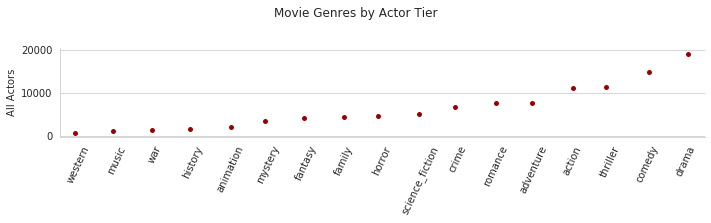

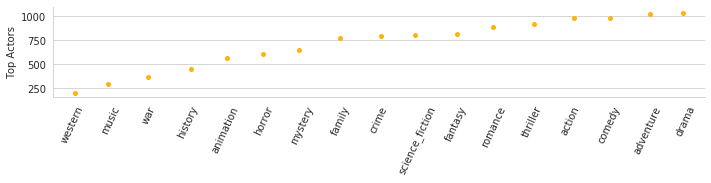

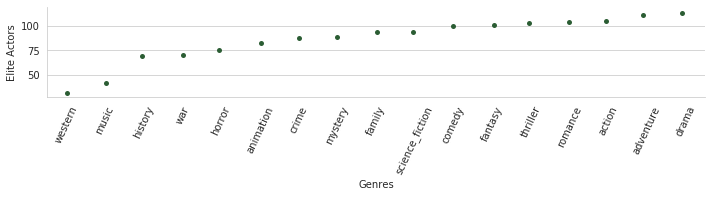

In [39]:
# plot genres by actor ranks

ax = sns.catplot(data=genre_count_df.sort_values('all_actors'), 
                 x='genre', y='all_actors', height=2, aspect=5, 
                 color=mp.colors(2), label='All Actors').set_xticklabels(rotation=65)
plt.xlabel('')
plt.ylabel('All Actors')

sns.catplot(data=genre_count_df.sort_values('is_top'), x='genre', y='is_top', 
            height=2, aspect=5, color=mp.colors(3)).set_xticklabels(rotation=65)
plt.xlabel('')
plt.ylabel('Top Actors')

sns.catplot(data=genre_count_df.sort_values('is_elite'), x='genre', y='is_elite', 
            height=2, aspect=5, color=mp.colors(4)).set_xticklabels(rotation=65)
plt.xlabel('Genres')
plt.ylabel('Elite Actors')

ax.fig.suptitle('Movie Genres by Actor Tier', y=1.2);

The drama genre is consistantly the most favorable to increase an actor's earning potential.<br>
The importance of comedy movies declines once we get to the elite actors.<br>
Adventure movies feature significantly once the top tier is reached.<br> 
Western, music, war, and history movies are consistantly at the bottom of earning options for any tiered actor.

In [40]:
# combine genres into feature and sum over all actors
gender_rank_df = pd.melt(df, 
                   id_vars=['gender', 'rank'], 
                   value_vars = genre_lst, 
                   var_name = 'genre', 
                   value_name = 'count')

In [41]:
# drop observations without genre
gender_rank_df = gender_rank_df.loc[gender_rank_df['count'] > 0]

In [42]:
# observe DataFrame
gender_rank_df.head(3)

,gender,rank,genre,count
0,male,2,action,8
1,male,2,action,18
2,female,2,action,6


Now, I have the actors grouped by their movie genres, genders, and ranks.

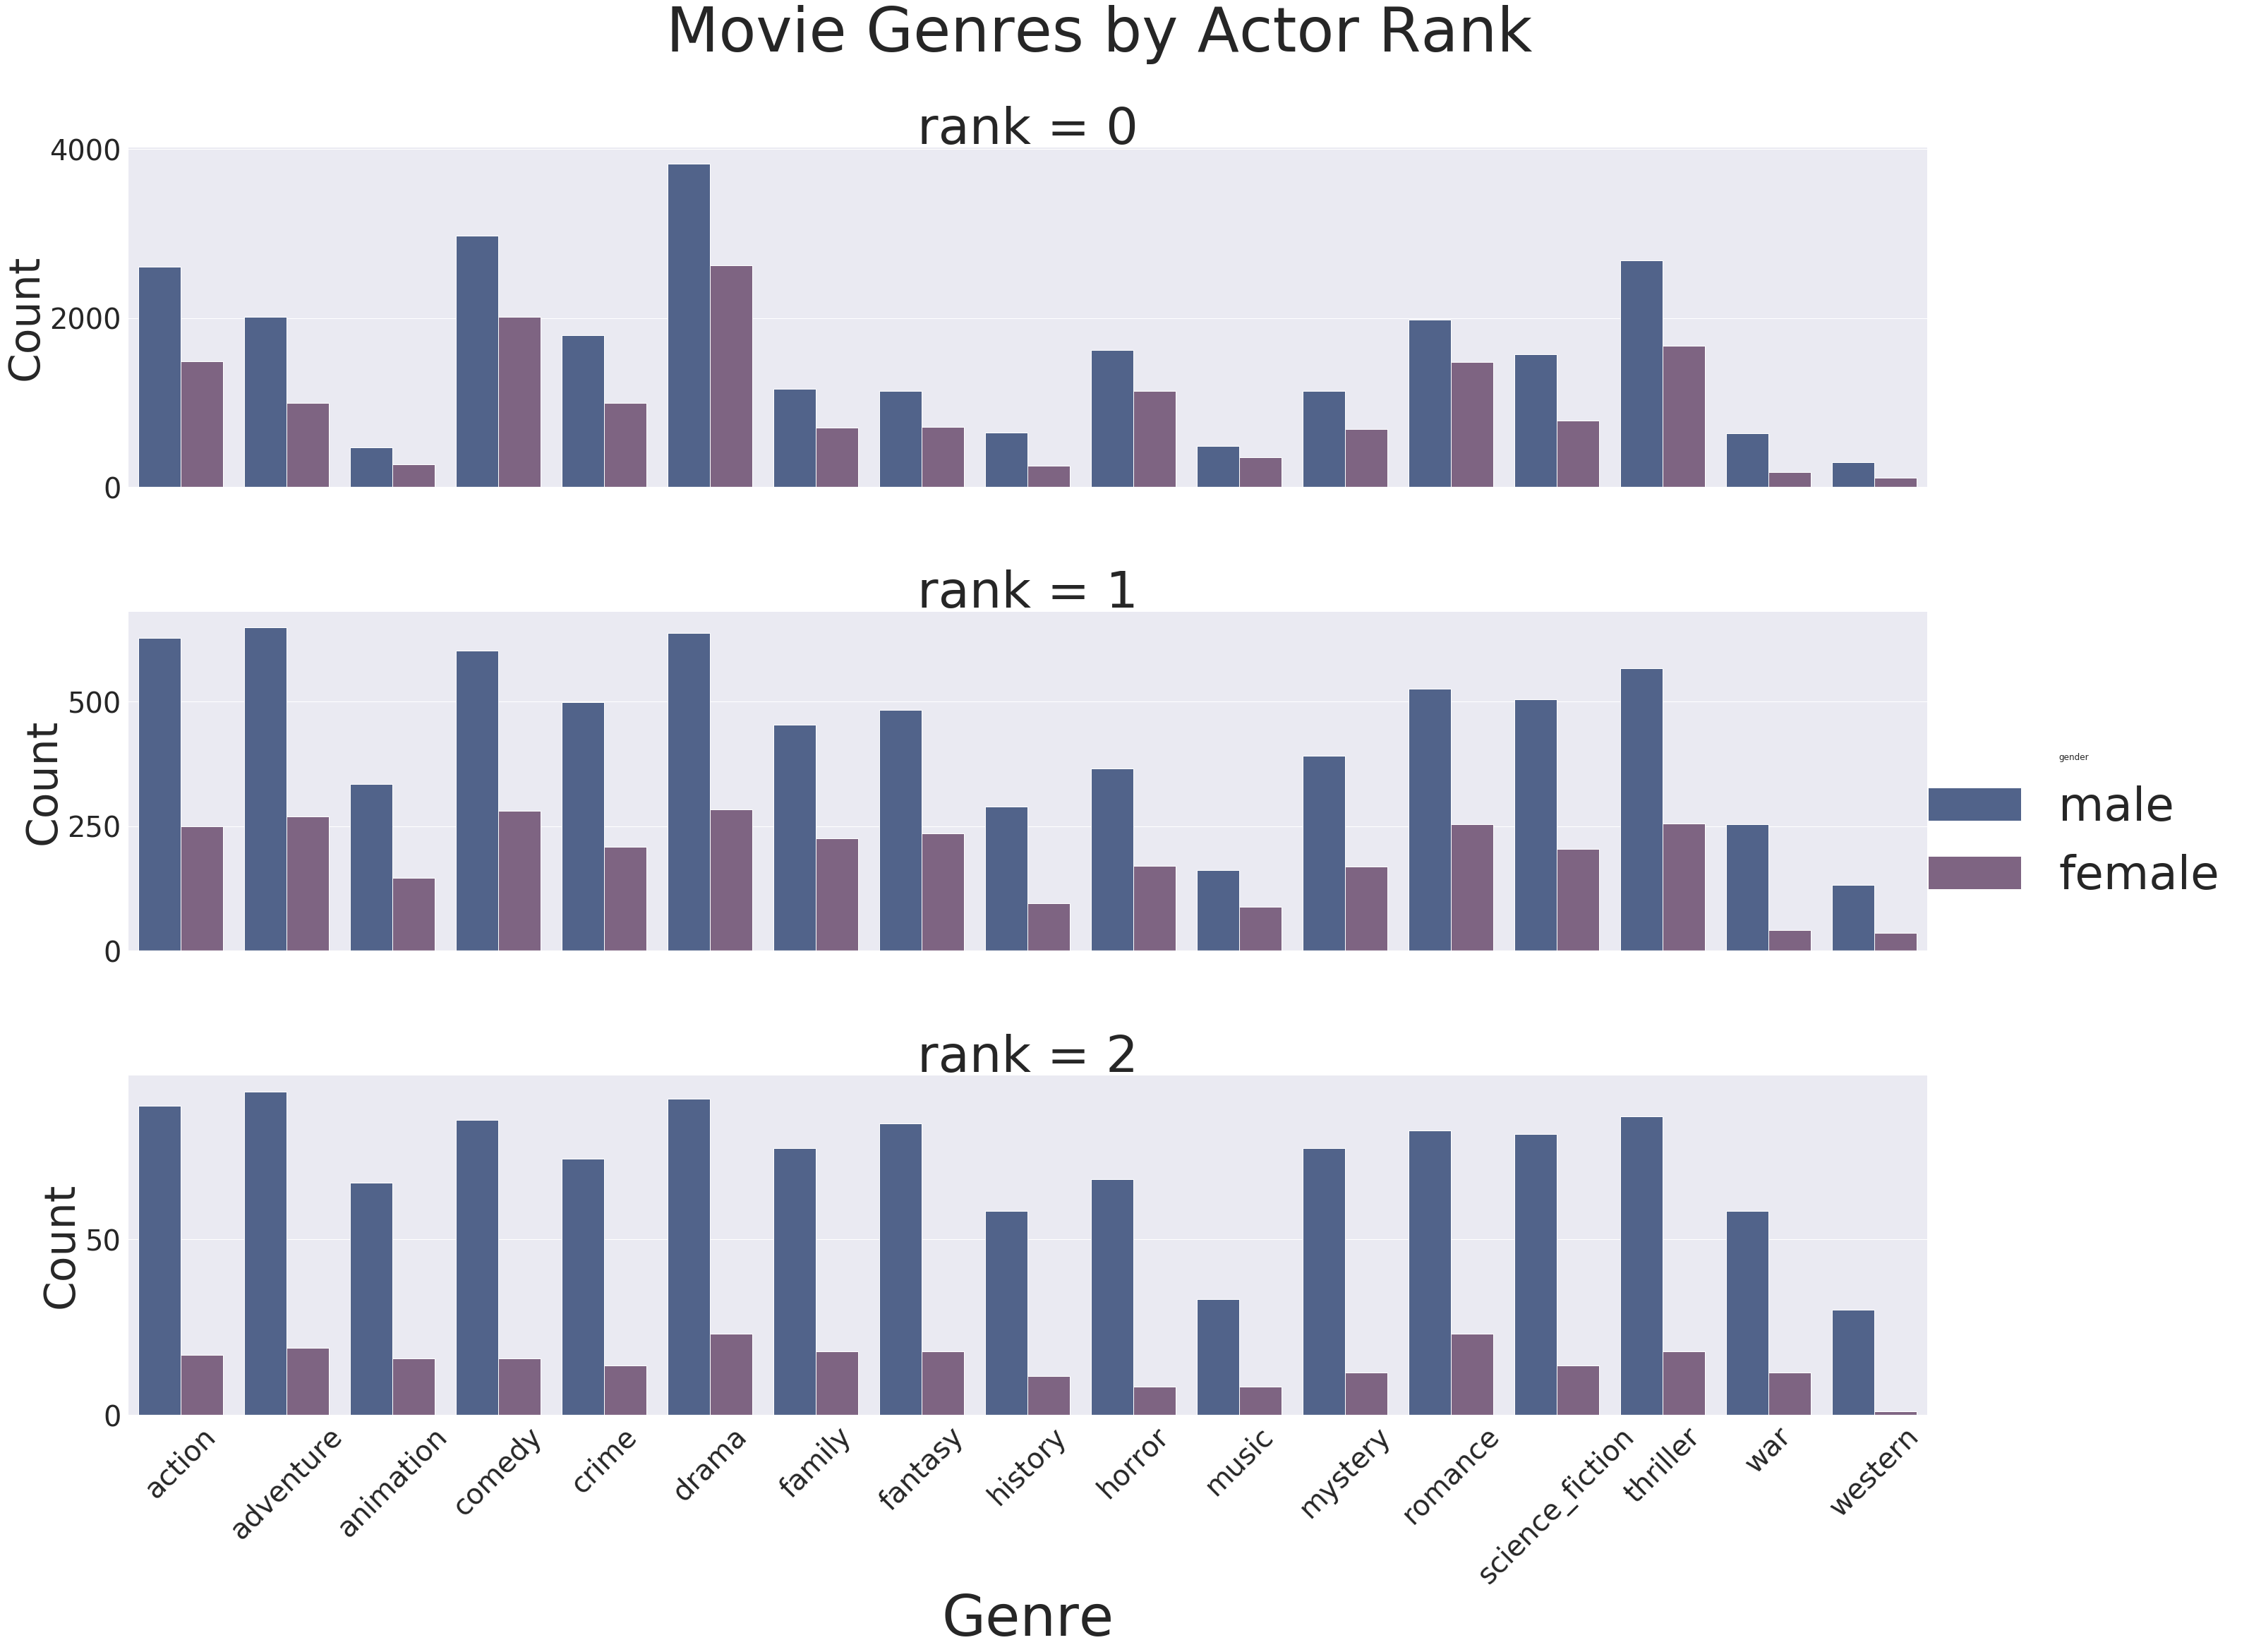

In [43]:
# plot distribution of genres by actor rank 

sns.set(font_scale=6)
g = sns.catplot(x='genre', hue='gender', row='rank', data=gender_rank_df, kind='count', 
            sharey=False, height=10, aspect=4, palette=sns.xkcd_palette(mp.my_colors))

g.set_xticklabels(fontsize=40, rotation=45)
g.set_yticklabels(fontsize=40)

g.set_xlabels(fontsize=40)
g.set_ylabels('Count', fontsize=60)

plt.xlabel('Genre', fontsize=80)

g.fig.suptitle('Movie Genres by Actor Rank', y=1.03);

The genres are more evenly distributed among the elite actors than they are among the rank 0 actors.<br>
Rank 0 actors tend to have roles in action, comedy, drama, and thriller movies.<br>
This can be observed in the previous plot, as well.<br>
As the ranks progress, the female actors get thinned out across all genres.

In [44]:
# observe percentage of all actors who are male
(df['gender'].value_counts() / df.shape[0])[0] * 100

60.805610194133244

In [45]:
# observe percentage of rank 0 actors who are male
(df[df['rank'] == 0]['gender'].value_counts() / df[df['rank'] == 0].shape[0])[0] * 100

59.78333174950109

In [46]:
# observe percentage of rank 1 actors who are male
(df[df['rank'] == 1]['gender'].value_counts() / df[df['rank'] == 1].shape[0])[0] * 100

68.94586894586895

In [47]:
# observe percentage of rank 2 actors who are male
(df[df['rank'] == 2]['gender'].value_counts() / df[df['rank'] == 2].shape[0])[0] * 100

79.48717948717949

It is quite apparent that the male actors dominate the highest tier for revenue totals.